<a href="https://colab.research.google.com/github/Emedion/Machine/blob/main/Sign_Language_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES AND DEPENDENCIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

UPLOADING OR IMPORTING THE DATASET

In [ ]:
from google.colab import files
upload = files.upload()

In [ ]:
fftest = pd.read_csv("sign_mnist_test.csv")
train = pd.read_csv("sign_mnist_train.csv")

INSPECTING OUR TRAINING DATA

In [ ]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207.0,207.0,207.0,207.0,206.0,206.0,206.0,204.0,203.0,202.0
1,6,155,157,156,156,156,157,156,158,158,...,69.0,149.0,128.0,87.0,94.0,163.0,175.0,103.0,135.0,149.0
2,2,187,188,188,187,187,186,187,188,187,...,202.0,201.0,200.0,199.0,198.0,199.0,198.0,195.0,194.0,195.0
3,2,211,211,212,212,211,210,211,210,210,...,235.0,234.0,233.0,231.0,230.0,226.0,225.0,222.0,229.0,163.0
4,13,164,167,170,172,176,179,180,184,185,...,92.0,105.0,105.0,108.0,133.0,163.0,157.0,163.0,164.0,179.0


GET OUR TRAINING LABELS

In [ ]:
labels = train['label'].values

VIEW THE UNIQUE LABELS, 24 IN TOTAL

In [ ]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [ ]:
train.shape, test.shape

((21431, 785), (7172, 785))

DATA DISTRIBUTION VISUALIZATION

Text(0.5, 1.0, 'Labels')

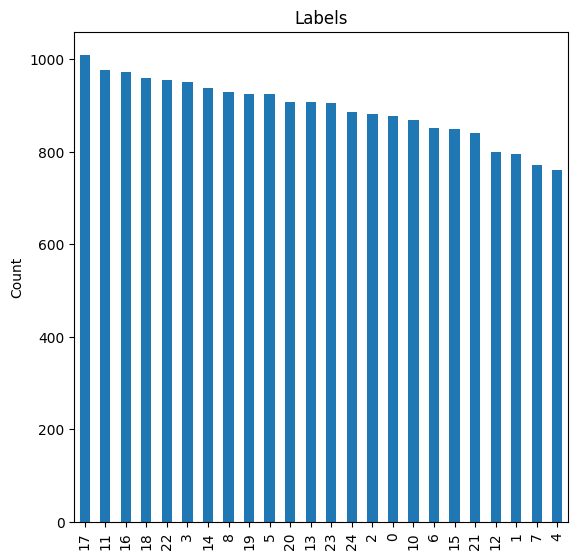

In [ ]:
fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(221)
train['label'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Labels')
# sn.countplot(x = labels)

In [ ]:
# Drop labels from trainiing data set
train.drop('label', axis = 1, inplace = True)

In [ ]:
# Extract the Image data from each row in our csv, remember it's in a row of 784 columns
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [ ]:
# hot one encode our labels
from sklearn.preprocessing import LabelBinarizer

label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


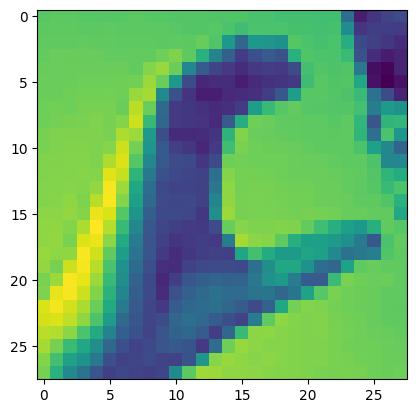

In [ ]:
# Inspect Image
index = 2
print(labels[index])
plt.imshow(images[index].reshape(28,28))

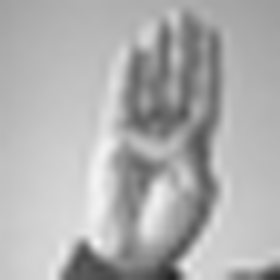

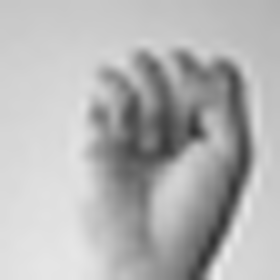

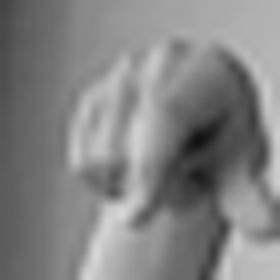

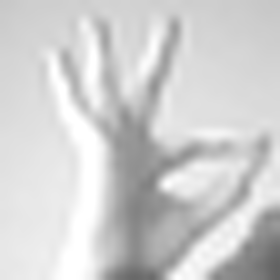

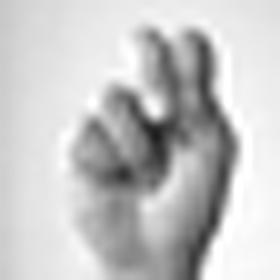

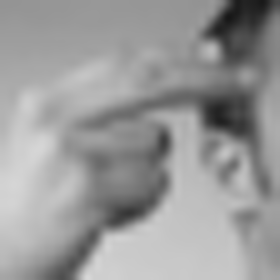

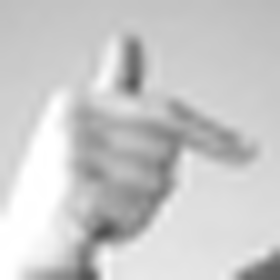

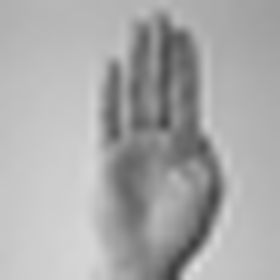

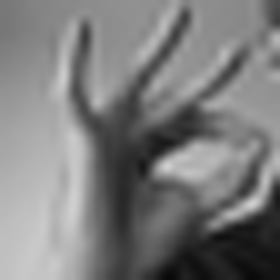

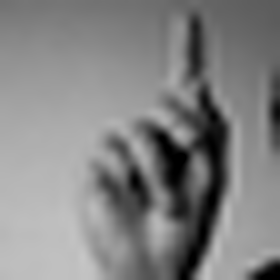

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

for i in range(0, 10):
    rand = np.random.randint(0, len(images))
    input_im = images[rand]

    sample = input_im.reshape(28, 28).astype(np.uint8)
    sample = cv2.resize(sample, None, fx=10, fy=10, interpolation = cv2.INTER_CUBIC)
    cv2_imshow(sample)
    cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Split out data into x_train, x_test, y_train and y_test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [ ]:
# Start Loading our tensorflow modules and define our batch size etc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

batch_size = 128
num_classes = 24
epochs = 10

In [ ]:
# Scale our images
x_train = x_train / 255
x_test = x_test / 255

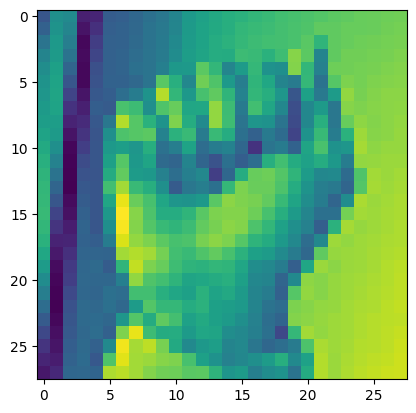

In [ ]:
# Reshape them into the size required by TF and keras
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

plt.imshow(x_train[0].reshape(28, 28))

In [ ]:
# Create our CNN Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras .optimizers import Adam

model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28, 1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))

In [ ]:
# Compile our Model
model.compile(loss = 'categorical_crossentropy',
             optimizer = Adam(),
             metrics=['accuracy'])


# model.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics=['acurracy'])

In [ ]:
# Train our model
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
151/151 [==============================] - 40s 244ms/step - loss: 2.5636 - accuracy: 0.2127 - val_loss: 1.5023 - val_accuracy: 0.5430
Epoch 2/10
151/151 [==============================] - 43s 282ms/step - loss: 1.1998 - accuracy: 0.6076 - val_loss: 0.8268 - val_accuracy: 0.7321
Epoch 3/10
151/151 [==============================] - 37s 247ms/step - loss: 0.6992 - accuracy: 0.7629 - val_loss: 0.4363 - val_accuracy: 0.8684
Epoch 4/10
151/151 [==============================] - 34s 229ms/step - loss: 0.4509 - accuracy: 0.8501 - val_loss: 0.2870 - val_accuracy: 0.9130
Epoch 5/10
151/151 [==============================] - 32s 210ms/step - loss: 0.3084 - accuracy: 0.8966 - val_loss: 0.2207 - val_accuracy: 0.9257
Epoch 6/10
151/151 [==============================] - 35s 233ms/step - loss: 0.2133 - accuracy: 0.9291 - val_loss: 0.1464 - val_accuracy: 0.9603
Epoch 7/10
151/151 [==============================] - 31s 208ms/step - loss: 0.1517 - accuracy: 0.9508 - val_loss: 0.0693 - val_ac

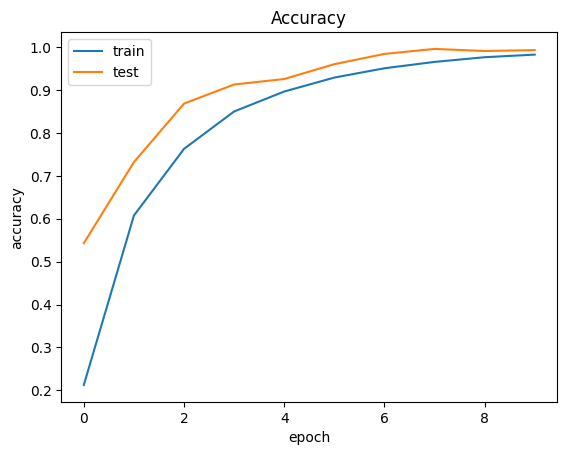

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

plt.show()

In [ ]:
model.save("sign_mnist_cnn_50_Epochs.h5")
print("Model Saved")

NameError: ignored

In [ ]:
test_labels = test['label']
test.drop('label', axis = 1, inplace = True)

test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

test_labels = label_binrizer.fit_transform(test_labels)

test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

test_images.shape

y_pred = model.predict(test_images)


225/225 [==============================] - 3s 12ms/step


In [ ]:
accuracy = accuracy_score(test_images, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_images, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_images, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_, ypred)
print('F1 score: %f' % f1)

In [ ]:
# Get our accuracy score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(test_labels, y_pred.round())
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_labels, y_pred.round(), pos_label='positive',
                                           average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_labels, y_pred.round(), pos_label='positive',
                                           average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_labels, y_pred.round(), pos_label='positive',
                                           average='micro')
print('F1 score: %f' % f1)

Accuracy: 0.784858
Precision: 0.784858
Recall: 0.784858
F1 score: 0.784858


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:
# Creat function to march label to letter
def getLetter(result):
    classLabels = { 0: "A",
                    1: "B",
                    2: "C",
                    3: "D",
                    4: "E",
                    5: "F",
                    6: "G",
                    7: "H",
                    8: "I",
                    9: "K",
                    10: "L",
                    11: "M",
                    12: "N",
                    13: "O",
                    14: "P",
                    15: "Q",
                    16: "R",
                    17: "S",
                    18: "T",
                    19: "U",
                    20: "V",
                    21: "W",
                    22: "X",
                    23: "Y",}
    try:
        res = int(result)
        return classLabels[res]
    except:
        return "Error"

In [ ]:
import cv2

cap = cv2.VideoCapture(0)
if not cap.isOpened(): print("Failed to open video capture")

while True:
    ret, frame = cap.read()

    roi = frame[100:400, 320:620]
    cv2.imshow('roi', roi)

    roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi_resized = cv2.resize(roi_gray, (28, 28), interpolation=cv2.INTER_AREA)

    cv2.imshow('roi scaled and gray', roi_gray)

    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620, 400), (255, 0, 0), 5)

    roi_reshaped = roi_resized.reshape(1, 28, 28, 1)

    result = str(model.predict_classes(roi_reshaped, 1, verbose=0)[0])
    cv2.putText(copy, getLetter(result), (300, 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    cv2.imshow('frame', copy)

    if cv2.waitKey(1) == 13:
        break

cap.release()
cv2.destroyAllWindows()


Failed to open video capture


TypeError: ignored